In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 

In [13]:
df = pd.read_csv('./dl/2nd/dados_A001_D_2001-01-01_2019-12-31.csv', sep=";", encoding="latin1", skiprows=9, decimal=",")

In [14]:
df.head(100)


,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)","TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)","TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",Unnamed: 11
0,2001-01-01,22.4,885.4,18.8,24.6,20.7,18.7,89.3,69.0,7.4,1.7,NaN
1,2001-01-02,37.2,885.9,18.3,24.7,20.7,18.5,87,67.0,9,2.4,NaN
2,2001-01-03,NaN,886.8,17.8,26.5,NaN,18.7,77.2,55.0,9,2.8,NaN
3,2001-01-04,NaN,888.5,17.5,26.3,NaN,17.4,80.2,59.0,10.1,3,NaN
4,2001-01-05,NaN,887.9,17,27.2,NaN,18.5,72.1,43.0,9.6,3.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2001-04-06,0,889,16,27.8,22.7,18.2,67,41.0,10,3.1,NaN
96,2001-04-07,0,889.2,15.3,28.3,22.9,18.1,64.1,39.0,10.3,3.1,NaN
97,2001-04-08,0,888.1,13.4,27.4,22.2,17.4,59.4,32.0,8.6,2.8,NaN
98,2001-04-09,0,886.3,12.3,27.6,22.5,17.3,53.5,32.0,8.8,2.5,NaN


In [15]:
df.isna().sum()

Data Medicao                                                  0
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                        328
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                  227
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)     226
TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)                       182
TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)                        307
TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)                       175
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)               142
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)               62
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                       84
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                   251
Unnamed: 11                                                6939
dtype: int64

In [16]:
df.shape

(6939, 12)

In [17]:
df = df.drop(['Data Medicao', 'Unnamed: 11'], axis=1)

In [18]:
df.head()

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)","TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)","TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,22.4,885.4,18.8,24.6,20.7,18.7,89.3,69.0,7.4,1.7
1,37.2,885.9,18.3,24.7,20.7,18.5,87,67.0,9,2.4
2,NaN,886.8,17.8,26.5,NaN,18.7,77.2,55.0,9,2.8
3,NaN,888.5,17.5,26.3,NaN,17.4,80.2,59.0,10.1,3
4,NaN,887.9,17,27.2,NaN,18.5,72.1,43.0,9.6,3.4


In [19]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df[df >= 0].dropna()

In [20]:
df.shape

(6539, 10)

In [21]:
df.rename(columns={'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)': 'PRECIPITACAO'}, inplace=True)

In [22]:
df['PRECIPITACAO'] = np.where(df['PRECIPITACAO'] > 0, 'CHOVE', 'NÃO CHOVE')

In [23]:
px.histogram(df, x='PRECIPITACAO', title='Distribuição de chuva em Brasília de 2001 a 2019')

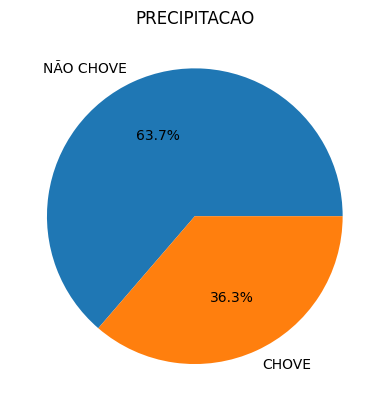

In [24]:
import matplotlib.pyplot as plt

# Count the occurrences of 'CHOVE' and 'NÃO CHOVE'
counts = df['PRECIPITACAO'].value_counts()

# Create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

# Add a title
plt.title('PRECIPITACAO')

# Display the chart
plt.show()


In [26]:
df.isna().sum()

PRECIPITACAO                                               0
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                 0
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C)    0
TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)                      0
TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)                       0
TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)                      0
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)              0
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)             0
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                     0
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                  0
dtype: int64

In [28]:
df['CHOVE'] = np.where(df['PRECIPITACAO'] == 'CHOVE', 1, 0)

In [29]:
df['NAO_CHOVE'] = np.where(df['PRECIPITACAO'] == 'CHOVE', 0, 1)

In [31]:
df

,PRECIPITACAO,PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)","TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)","TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",CHOVE,NAO_CHOVE
0,CHOVE,885.4,18.8,24.6,20.7,18.7,89.3,69.0,7.4,1.7,1,0
1,CHOVE,885.9,18.3,24.7,20.7,18.5,87.0,67.0,9.0,2.4,1,0
14,NÃO CHOVE,888.0,14.4,27.2,22.0,17.8,63.0,41.0,10.8,3.8,0,1
15,NÃO CHOVE,887.9,13.7,26.3,21.8,17.7,61.2,35.0,10.6,4.3,0,1
16,NÃO CHOVE,888.1,15.0,27.4,21.9,18.1,66.0,41.0,8.4,3.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6934,NÃO CHOVE,887.0,17.0,28.5,23.8,19.6,67.7,43.0,9.7,2.9,0,1
6935,CHOVE,886.4,15.4,29.0,23.9,19.3,60.5,32.0,8.9,3.0,1,0
6936,NÃO CHOVE,885.4,15.2,29.8,24.2,18.4,59.5,34.0,7.8,2.5,0,1
6937,NÃO CHOVE,884.0,15.1,29.1,24.0,18.4,58.7,38.0,8.1,2.2,0,1


In [32]:
px.box(df, x ='PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)', color = 'PRECIPITACAO' )

In [60]:
z_scores = df.drop(['PRECIPITACAO', 'CHOVE', 'NAO_CHOVE'], axis=1)

In [61]:
# Selecione apenas as colunas numéricas (remova as colunas não numéricas)
numeric_columns = z_scores.select_dtypes(include=[np.number])

In [62]:
from scipy.stats import zscore
# Calcule os z-values para todas as colunas numéricas
z_scores = zscore(numeric_columns)

# Converta os z-values em um DataFrame
z_scores_df = pd.DataFrame(z_scores, columns=numeric_columns.columns)

In [63]:
z_scores_df

,PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)","TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)","TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,-0.849197,1.245473,-1.073368,-0.365251,0.890690,1.478173,1.948107,-0.773035,-0.955734
1,-0.628318,1.121668,-1.031639,-0.365251,0.799420,1.334301,1.806844,0.045312,0.003226
14,0.299374,0.155988,0.011595,0.314617,0.479975,-0.166978,-0.029575,0.965952,1.921147
15,0.255198,-0.017339,-0.363969,0.210022,0.434339,-0.279574,-0.453364,0.863659,2.606119
16,0.343550,0.304554,0.095054,0.262320,0.616880,0.020682,-0.029575,-0.261569,1.510164
...,...,...,...,...,...,...,...,...,...
6934,-0.142384,0.799774,0.554077,1.255974,1.301406,0.127023,0.111688,0.403338,0.688198
6935,-0.407439,0.403598,0.762724,1.308271,1.164501,-0.323361,-0.665258,-0.005835,0.825192
6936,-0.849197,0.354076,1.096559,1.465164,0.753785,-0.385914,-0.523995,-0.568449,0.140221
6937,-1.467658,0.329315,0.804454,1.360569,0.753785,-0.435957,-0.241469,-0.415009,-0.270762


In [64]:
z_scores_df2 = z_scores_df[z_scores_df < 3]
z_scores_df2 = z_scores_df2[z_scores_df2 > -3]
z_scores_df2

,PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(Â°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(Â°C)","TEMPERATURA MEDIA, DIARIA (AUT)(Â°C)","TEMPERATURA MINIMA, DIARIA (AUT)(Â°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,-0.849197,1.245473,-1.073368,-0.365251,0.890690,1.478173,1.948107,-0.773035,-0.955734
1,-0.628318,1.121668,-1.031639,-0.365251,0.799420,1.334301,1.806844,0.045312,0.003226
14,0.299374,0.155988,0.011595,0.314617,0.479975,-0.166978,-0.029575,0.965952,1.921147
15,0.255198,-0.017339,-0.363969,0.210022,0.434339,-0.279574,-0.453364,0.863659,2.606119
16,0.343550,0.304554,0.095054,0.262320,0.616880,0.020682,-0.029575,-0.261569,1.510164
...,...,...,...,...,...,...,...,...,...
6934,-0.142384,0.799774,0.554077,1.255974,1.301406,0.127023,0.111688,0.403338,0.688198
6935,-0.407439,0.403598,0.762724,1.308271,1.164501,-0.323361,-0.665258,-0.005835,0.825192
6936,-0.849197,0.354076,1.096559,1.465164,0.753785,-0.385914,-0.523995,-0.568449,0.140221
6937,-1.467658,0.329315,0.804454,1.360569,0.753785,-0.435957,-0.241469,-0.415009,-0.270762


In [65]:
print(max(z_scores_df2['VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)']))

2.880107673331552


In [67]:
print(min(z_scores_df2))

PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)


In [68]:
print(min(z_scores_df2['VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)']))

-2.325677570932927


In [55]:
px.box(df, x ='VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)', color = 'PRECIPITACAO' )